# Neural Network From Scratch

### Developing a Neural Network from scratch only with numpy and without using any pre-defined packages

In the notebook, I have developed a Neural Network model from scratch. I have not used any pre-defined package to develop it.

In the following Notebook, I have implemented a Logistic Regression Model, tested it on 2 data sets, developed a shallow Neural Network (with 1 hidden layer) and implemented further improvements on the aforementioned Neural Network. 

I have tested the network on 3 datasets:

1)Linearly seperable data. 

2)Non-Linearly seperable data. 

3)CIFAR-10 Image Dataset. 

I have divided the notebook into multiple parts according to the question provided. 

### Part I:
Implementing a Logistic Regression Model.

### Part II:
Testing the Logistic Regression Model using the data sets provided.

### Part III:
Building the Shallow Neural Network Model.

### Part IV: 
Testing the Shallow Neural Network using the image data set.

### Part V:
Implementing the Neural Network advancements. 

In the below line of codes I have implemented the Logistic Regression Model with a Neural Network perspective. 



# Part I
## Implement Logistic Regression


I have implemented the Logistic Regression Model using a Neural Network mindset, by developing forward propagation, back propagation and gradient descent functions.I have added the snippets of text in between the code to explain my thinking and approach. 

Note on Notations used:

I have folowed the standard Stanford notation through out the code. 

J: Cost; w: Weights; b: biases; z: Summation of the product of weight and input and bias; A: The result of the activation function

dw:  I have used the notation dw and db as it dw represents: dJ/dw and dJ/db. In case of Python notations I have used dw to represent dJ/dw, db to represent dJ/db.


# Logistic Regression with a Neural Network Mindset:

The Logistic Regression can be considered to a single neuron in the larger Neural Network. Multiple such neurons can be stacked together to create a Neural Network.

The Logistic Regression Model can be broadly defined into 3 principal phases:

## 1)Forward Propagation: 

In this phase the input values are put through the summation step, which is then put through the activation fucntion. This can be represented as: 
#### A=f(z); 
A is the result of the activation fucntion; f=activation function; 
#### z= (w*X+b).In the formula


## 2)Backward Propagation: 

In this phase the cost over all the training cases are computd. 
The cost is the loss computed over all the training cases.

The loss for each of the training cases can be computed using the below formula:

#### L(A,y) = -y(log(A))-(1-y)log(1-A)

A = value obtained from the activation fucntion; 
y = actual label values. 

The objective at each of the training steps is to minimize the loss. 

Thus,
at y=1, L(A,y) = -log(A);
at y=0, L(A,y) = -log(1-A);

Cost = The loss over all the training cases; this can be determined using the below formula:

#### J = -1./n* np.sum(Y*np.log(A) + (1-Y)*np.log(1-A)) 

J = Cost being computed; n = size of the training cases; A = result of the activation function; Y = actual output label. 

## 3)Updating the weights, biases

Once the cost has been computed, our objective is to find its minima. This can be computed using the gradient descent algorithm. 
The gradient descent can be calculated using the below formula:

#### dw = dJ/dw = (1/n)*sum(X*(A-Y))

#### db = dJ/db = (1/n)*sum(A-Y)

The values of dw, db represent steps towards the minimum value of the cost. 

Once these values have been computed, they have to be adjusted to the initially computed weights and biases, so we update the weights and biases using the below formula:

#### weights = weights - (learning rate * dw)

#### bias = bias -(learning rate * db)

## Logistic Regression Flow of Code:

I have described below the flow of the code, as I have implemented it. 

#### 1) Importing of packages
#### 2)Developing the sigmoid activation function
#### 3)Function for Initialization of parameters (weights and biases)
#### 4)Function for Propagation (forward and backward)
#### 5)Function to Update Parameters
#### 6)Function to Predict the outputs
#### 7)Function to combine all the other functions into the Logistic Regression Model
#### 8)Reading of the DataSets
#### 9)Testing the Data Sets (Blobs300, Circles600)
#### 10)Plotting the change in cost

In [ ]:
#Importing Packages

#In this section I have imported all the necessary packages:
#I have used numpy to handle multi-dimensional arrays
import numpy as np
#I ahve used pandas to load the data sets as daat frame
import pandas as pd
import copy
#I have used the matplotlib, to plot both the data set and the change in costs
import matplotlib.pyplot as plt
#I have used the train_test_split to split the data 
from sklearn.model_selection import train_test_split
#I have imported the LogisticRegression from sklearn as a benchmarking model
from sklearn.linear_model import LogisticRegression

In the below code I have developed the individual functions which will add up to the final model design. 

In [ ]:
#Developing the sigmoid function:
def sigmoid(z):
  #The variable s will hold the sigmoid value of the passed data
  s = 1/(1 + np.exp(-z))
  return s

In [ ]:
#Initializing weight and biases:
#In this section I have initialized the weights

#def initialize_with_zeros(dimension):
def initialize_weights(dimension):
  #I have represented the weight vector as 'w' and the bias as 'b'

  w = np.zeros((dimension, 1))  #The weight has been initialized as a vector
  b = 0   #The bias has been initialized as a scalar quantity
  
  #I am returning the variables to the calling function
  return w, b

In [ ]:
def get_cost(A, Y):
  m = Y.shape[1] # number of examples
  J = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
  J = np.squeeze(J) 
  return J

In [ ]:
#In the below function I have defined the propagation fucntion

def propagation(w, b, X, Y):
    #Identifying the size and saving it in the variable 'n'
    n = X.shape[1]

    #Passing the data into the previously defined sigmoid function and saving the value in A
    A = sigmoid(np.dot(w.T, X) + b)

    #The below code finds the loss averaged over the size resulting into the cost, J. 
    J = -1./n* np.sum(Y*np.log(A) + (1-Y)*np.log(1-A)) 

    #The below code finds the gradient of weight and bias and stores it in the variable dw, db. 
    #I have used the notation dw and db as it dw represents: dJ/dw and dJ/db. 
    #In case of Python notations I have used dw to represent dJ/dw, db to represent dJ/db.                          
    dw = 1./n*np.dot(X, (A-Y).T)
    db = 1./n*np.sum(A-Y)

    #The np.squeeze function removes the axes of length 1
    cost = np.squeeze(np.array(J))
    gradients = {"dw": dw, "db": db}
             
    #I have faced dimension issues while returning multiple varaibles from a single funtion, 
    #that is why I have used a dictionary to pass the values between functions. 

    return gradients, cost

In [ ]:
#Parameter Update:
#In the below function I am updating the values of w,b according to teh gradients 
def update(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
  
  #Initializing the cost list
  cost_list = []

  #The function 'deepcopy' keeps a copy of object is copied in other object. 
  #Thus any change made to the copy will not be reflected on the original object.
  w = copy.deepcopy(w)
  b = copy.deepcopy(b)

  #Running the for loop, to iterate over each of the individual gradients and costs
  for i in range(num_iterations):
    #Calling the function and storing its responses in the variables gradients, 
    #cost. Isolating the variables from the dictionary. 
    gradients, cost = propagation(w, b, X, Y)
    dw = gradients["dw"]
    db = gradients["db"]

    #Updating the weights, biases according to the formula: 
    #weight = weight - (learning rate * weight_gardients)
    w = w - learning_rate * dw
    b = b - learning_rate * db

    #Running the if, else condition to update the cost_list and print the 
    #cost to monitor the change in cost
    if i % 100 == 0:
      cost_list.append(cost)
      if print_cost:
        print ("Cost after iteration %i: %f" %(i, cost))

  #Updating the parameter dictionary. 
  parameters = {"w": w, "b": b}

  #Updating the gradients dictionary.               
  gradients = {"dw": dw,"db": db}

  #Returnign the parameters, gradients and cost_list         
  return parameters, gradients, cost_list

In [ ]:
#Predict Function:
#The below defined function is used to predict the values. 

#In the below fucntion the y_hat values are precited 
def predict(w, b, X):
  #Initializing the size of the input data to be used for predicting values. 
  size = X.shape[1]

  #Y_hat will hold the values being predicted
  Y_hat = np.zeros((1, size))

  #Reshaping the weights according to the input data used for prediction purposes. 
  w = w.reshape(X.shape[0], 1)

  #Calling the sigmoid function and storing the resultant values in teh variable 's'
  s = sigmoid(np.dot(w.T, X) + b)

  #Running the for loop below to change the raw values being 
  #returned to 0/1 alternatives. 
  for i in range(s.shape[1]):
    if s[0, i] > 0.5 :
      Y_hat[0,i] = 1
    else:
      Y_hat[0,i] = 0

  #Returning the predicted values
  return Y_hat

In [ ]:
#Logistic Model:
#In the below code I have combined the code snippets defined above into 
#a single Logistic Model. 

def logistic_model(data_set,X_train, Y_train, X_test, Y_test, iterations=2000, 
                   learning_rate=0.5, print_cost=False):
  #w, b = initialize_with_zeros(X_train.shape[0])
  #Initializing the weights, biases by calling the 'initialize_weights' function.
  #I am passing the shape of the X_training dataset
  w, b = initialize_weights(X_train.shape[0])

  #In the below code I have called the update function to get the 
  #updated parameter, gradients and cost values
  parameters, gradients, cost_list = update(w, b, X_train, Y_train, 
                                            iterations, learning_rate, print_cost = print_cost)

  w = parameters["w"]
  b = parameters["b"]

  
  #In the below code, I have called the 'predict' function and stored the 
  #results in the Y_pred_train and Y_pred_test
  Y_pred_train = predict(w, b, X_train)
  Y_pred_test = predict(w, b, X_test)

  print("Printing the Training/Testing Accuracies of the following DataSet: ",data_set)
        
  if print_cost:
    print("Accuracy of the Training DataSet: {} %".format
          (100 - np.mean(np.abs(Y_pred_train - Y_train)) * 100))
    print("Accuracy of the Testing DataSet: {} %".format
          (100 - np.mean(np.abs(Y_pred_test - Y_test)) * 100))

  result_set = {"cost_list": cost_list,
       "Y_pred_train": Y_pred_train,
       "Y_pred_test": Y_pred_test,
       "w" : w,
       "b" : b,
       "learning_rate" : learning_rate,
       "iterations": iterations}

  #Returning the result set to the calling function
  return result_set    

# Part II
## Easy Tasks

Testing the Logistic Regression Model on the blobs300 and circles600 data set. 

I have used the code provided by Michael Madden to load and visualize the datasets.

Shape of X: (300, 4)
Shape of Y: (300,)


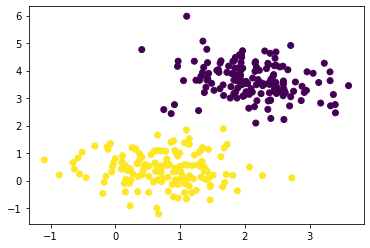

In [ ]:
#Data Set:
#Loading and visualizing the blobs300 dataset
#Using section of code provided by Michael Madden

#Using pandas to load the dataset as a dataframe
df = pd.read_csv("blobs300.csv")

#Extracting the 'Class' values and storing it in y. 
y = df['Class'].values

# The x values are all other columns
del df['Class']   # drop the 'Class' column from the dataframe
X = df.values     # convert the remaining columns to a numpy array

# plot X[0] vs X[1] and colour points according to the class, y
plt.scatter(X[:,0], X[:,1], c=y)  

print("Shape of X:",X.shape)
print("Shape of Y:",y.shape)

#Splitting data into train and test sets
X_train_blobs, X_test_blobs, Y_train_blobs, Y_test_blobs = train_test_split(X, y, 
                                                test_size=0.3, random_state=42)

In [ ]:
#Running the Logistic Model and testing the accuracy of blobs300 data set:
#The data set is almost fully linearly seperable as detailed by the 
#results of the model
data_set = "Blobs300"
iterations=2000
X_train_flatten_blobs = X_train_blobs.reshape(X_train_blobs.shape[0], -1).T 
Y_train_flatten_blobs = Y_train_blobs.reshape(Y_train_blobs.shape[0], -1).T 
X_test_flatten_blobs = X_test_blobs.reshape(X_test_blobs.shape[0], -1).T 
Y_test_flatten_blobs = Y_test_blobs.reshape(X_test_blobs.shape[0], -1).T 

logistic_regression_model = logistic_model(data_set,X_train_flatten_blobs,Y_train_flatten_blobs,
                                           X_test_flatten_blobs,Y_test_flatten_blobs,iterations=2000,learning_rate=0.005,print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.480744
Cost after iteration 200: 0.390635
Cost after iteration 300: 0.331346
Cost after iteration 400: 0.288966
Cost after iteration 500: 0.257317
Cost after iteration 600: 0.232859
Cost after iteration 700: 0.213412
Cost after iteration 800: 0.197582
Cost after iteration 900: 0.184438
Cost after iteration 1000: 0.173342
Cost after iteration 1100: 0.163840
Cost after iteration 1200: 0.155606
Cost after iteration 1300: 0.148394
Cost after iteration 1400: 0.142019
Cost after iteration 1500: 0.136339
Cost after iteration 1600: 0.131242
Cost after iteration 1700: 0.126639
Cost after iteration 1800: 0.122459
Cost after iteration 1900: 0.118643
Printing the Training/Testing Accuracies of the following DataSet:  Blobs300
Accuracy of the Training DataSet: 99.04761904761905 %
Accuracy of the Testing DataSet: 100.0 %


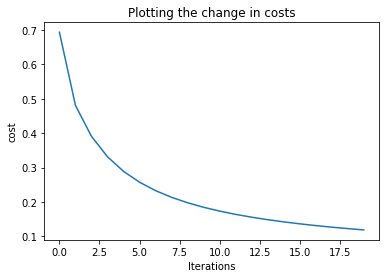

In [ ]:
#Plotting the change in cost

cost = logistic_regression_model["cost_list"]
plt.plot(cost)
plt.ylabel('cost')
plt.xlabel('Iterations')
plt.title("Plotting the change in costs")
plt.show()

Shape of X: (600, 2)
Shape of Y: (600,)


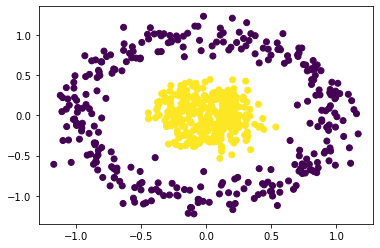

In [ ]:
#Data Set:
#Loading and visualizing the circles 600 data set
#Loading the partially linearly seperable data set (circles600)
#Using pandas to read the CSV file as a dataframe

#Using section of code provided by Michael Madden
df = pd.read_csv("circles600.csv")

#Extracting the 'Class' values and storing it in y. 
y = df['Class'].values

# The x values are all other columns
del df['Class']   # drop the 'Class' column from the dataframe
X = df.values     # convert the remaining columns to a numpy array

# plot X[0] vs X[1] and colour points according to the class, y
plt.scatter(X[:,0], X[:,1], c=y)  

print("Shape of X:",X.shape)
print("Shape of Y:",y.shape)

#Data Split:

#X_train, X_test, Y_train, Y_test = train_test_split(X, yt, test_size=0.33, random_state=42)
X_train_circles, X_test_circles, Y_train_circles, Y_test_circles = train_test_split(X, y,
                                                test_size=0.3, random_state=42)


In [ ]:
#Running the Logistic Model and testing the accuracy of circles600 data set:
#The data is clearly not linearly seperable

data_set = "Circles600"
X_train_flatten_circles = X_train_circles.reshape(X_train_circles.shape[0], -1).T 
Y_train_flatten_circles = Y_train_circles.reshape(Y_train_circles.shape[0], -1).T 
X_test_flatten_circles = X_test_circles.reshape(X_test_circles.shape[0], -1).T 
Y_test_flatten_circles = Y_test_circles.reshape(X_test_circles.shape[0], -1).T 

logistic_regression_model = logistic_model(data_set, X_train_flatten_circles, 
Y_train_flatten_circles, X_test_flatten_circles, Y_test_flatten_circles, 
iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.692900
Cost after iteration 200: 0.692674
Cost after iteration 300: 0.692466
Cost after iteration 400: 0.692274
Cost after iteration 500: 0.692096
Cost after iteration 600: 0.691932
Cost after iteration 700: 0.691780
Cost after iteration 800: 0.691638
Cost after iteration 900: 0.691507
Cost after iteration 1000: 0.691384
Cost after iteration 1100: 0.691270
Cost after iteration 1200: 0.691163
Cost after iteration 1300: 0.691064
Cost after iteration 1400: 0.690972
Cost after iteration 1500: 0.690885
Cost after iteration 1600: 0.690804
Cost after iteration 1700: 0.690729
Cost after iteration 1800: 0.690658
Cost after iteration 1900: 0.690592
Printing the Training/Testing Accuracies of the following DataSet:  Circles600
Accuracy of the Training DataSet: 68.33333333333334 %
Accuracy of the Testing DataSet: 58.88888888888889 %


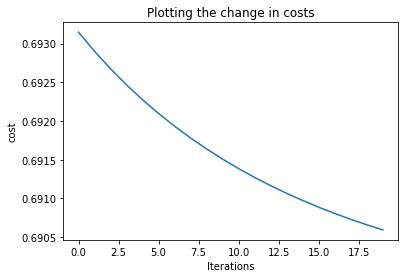

In [ ]:
#Plotting the change in cost

cost = logistic_regression_model["cost_list"]
plt.plot(cost)
plt.ylabel('cost')
plt.xlabel('Iterations')
plt.title("Plotting the change in costs")

plt.show()

## Note on the testing accuracy of the provided datasets using Logistic Regression

Blobs300: From the testing data above it is clear that as the blobs300 data set is fully linearly seperable, thus the Logistic Regression Algorithm is able to handle it and performs quite well on the Testing data set. The training accuracy on the dataset is nearly 100%, whereas the testing accuracy is close to 99%. 

Circles600: This dataset is not fully linearly seperable, thus the Logistic Regression Algorithm is not able to perform very well on the provided dataset. The training accuracy on the dataset is nearly 66%, wwhereas the testing accuracy is around 58%. 

In the below lines of code I have imported the Logistic Regression from sklearn to test the accuracy of the data set. 

In [ ]:
#Implementing a Logistic Regression from sklearn to test the accuracy on the circles600 dataset
#Fitting the data in the Logiatic Regression Algorithm 
clf = LogisticRegression(random_state=0).fit(X_train_circles, Y_train_circles)
y_pred = clf.predict(X_test_circles)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test_circles, y_pred)
print("The accuracy score of the Circles dataset on the benchmarking algorithm is below:")
(accuracy_score(Y_test_circles, y_pred, normalize=False)/len(Y_test_circles))*100

#The accuracy score of the logistic regression is quite low, 
#which confirms the fact that the data is not linearly 
#seperable so it is giving low accuracy scores. 

The accuracy score of the Circles dataset on the benchmarking algorithm is below:


53.888888888888886

The results from the Logistic Regression Alggorithm of sklearn also confirms the assumption that the accuracy of the Cirlces600 data set is not very good as its not a linearly seperable data. 

# Part III
## Implement and Test a Shallow Neural Network

Implementing and Testing a Shallow Neural Network 

In this part I have defined a Neural Network with only 1 hidden layer. 

## Neural Network

### Neural Network Structure:

#### 1)Forward Propagation: 

I have detailed the fomulas followed below: (I am not able to type the formulas as defined in the lectures, thus I have only listed the formulas that have been implemented).

#### z1 = np.dot(W1, X) + b1
#### A1 = sigmoid(z1)
#### z2 = np.dot(W2, A1) + b2
#### A2 = sigmoid(z2)

#### 2)Back Propagation: 

In this phase the cost over all the training cases are computed. 
The cost is the loss computed over all the training cases.
##### The idea is to find the weights, biases that minimize the cumulative cost over the training cases. 

The loss for each of the training cases can be computed using the below formula:

#### L(A2,y) = -ylog(A2)-(1-y)log(1-A2)

A = value obtained from the activation fucntion; 
y = actual label values. 

The objective at each of the training steps is to minimize the loss. 

Thus,
at y=1, L(A2,y) = -log(A2);
at y=0, L(A2,y) = -log(1-A2);

Cost = The loss over all the training cases; this can be determined using the below formula:

#### J = (1/m)*L(A2,y)

J = Cost being computed; m = size of the training cases; A2 = result of the activation function; Y = actual output label.

#### dz2= A2 - Y 
#### dz1 = np.multiply(np.dot(np.transpose(W2), dz2), 1 - np.power(A1, 2))

     
#### dW2 = (1 / m) * np.dot(dz2, np.transpose(A1))
#### db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)
                     
#### dW1 = (1 / m) * np.dot(dz1, np.transpose(X))
#### db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)


#### 3)Parameter Update/Optimization: 

The parameters have to be updated to optmize the algorithm. This can be acheived by using the below formulas:
#### W1 = W1 - learning_rate * dW1
#### b1 = b1 - learning_rate * db1
#### W2 = W2 - learning_rate * dW2
#### b2 = b2 - learning_rate * db2

In the below lines of code I have defined a shallow Neural Network. I have reused parts of the code, functions,  as defined in Part I. 

## I have implemented the Shallow Neural Network in the below functions: 

In [ ]:
#Initializing Parameters for the Neural Network:
#In the below code I have defined the function to initialize the parameters 
#for the Neural Network. 

#I am passing the sizes of X, Y and the size of the hidden layer 
#in the below fucntion

def NN_parameter_initialization(n_x, n_h, n_y):
    #np.random.seed(1)
    #Initializing the weights and biases 
    W1 = np.random.randn(n_h, n_x) * 0.001
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.001
    b2 = np.zeros(shape=(n_y, 1))
    
    #I am storing the necessary weights and biases in the dictionary params
    params = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
                  
    return params

In [ ]:
def NN_forward_propagation(X, parameters): 
    #I am isolating the weights and biases from the parameters. 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    #The variable 'm' holds the shape of X
    m = X.shape[1]
    
    #Calculating z1, the value before putting it in the activation fucntion.
    z1 = np.dot(W1, X) + b1

    #Calculating A1, which is the value obtained after putting z1 into the 
    #sigmoid activation function. 
    A1 = sigmoid(z1)

    #Calculating z2, the value before putting it in the activation fucntion.
    z2 = np.dot(W2, A1) + b2

    #Calculating A2, which is the value obtained after putting z2 into the 
    #sigmoid activation function.
    A2 = sigmoid(z2)
    
    #Storing the values of A1, A2 (values after putting z1, z2 in the 
    #activation functions) in the dictionary 'forward_propagation'. 
    forward_propagation = {"A1": A1,"A2": A2}
    
    #Returning the forward_propagation dictionary
    return forward_propagation

In [ ]:
def NN_back_propagation(parameters, forward_propagation, X, Y):
   
    #The variable 'm' holds the shape of X
    m = X.shape[1]
    
    #I am isolating the W1, W2 from the 'parameters' dictionary. 
    W1 = parameters['W1']
    W2 = parameters['W2']
    #I am isolating the A1, A2 values from the 'forward_propagation' dictionary. 
    A1 = forward_propagation['A1']
    A2 = forward_propagation['A2']
    
    #Backpropagation step:
    #In the below steps I have calculated the gradients

    dz2= A2 - Y 
    dz1 = np.multiply(np.dot(np.transpose(W2), dz2), 1 - np.power(A1, 2))

    #Calculating the gradients of the weights and biases. 
    dW2 = (1 / m) * np.dot(dz2, np.transpose(A1))
    db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)
                     
    dW1 = (1 / m) * np.dot(dz1, np.transpose(X))
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)
    
    #Storing the gradients in teh dictionary. 
    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
                 
    #Returning the gradients as obtained from the Backpropagation step. 
    return gradients

In [ ]:
#Parameter update:
#In the below function I have updated the parameters. 
#The function takes in the existing dictionaries of parameters 
#and gradients and the learning rate. 

#The fucntion then updates the existing weights and biases. 

def NN_Param_Update(parameters, gradients, learning_rate=0.001):
    
    #Isolating the weights and biases from the dictionary parameters. 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    ##Isolating the weights and biases from the gradients parameters.
    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']
    
    #In the below step the update of the weights have been implemented. 
    #The weights and biases have been updated in the below code 
    #folloing the below formula:
    #updated_weight = weight - (learning_rate*gardient_weight)

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    #Updating the parameter dictionary with the updated values of the 
    #weights and biases. 
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    #Returning the updated parameters to the calling function. 
    return parameters

In [ ]:
#Prediction Function:
#In the below function I have taken the parameters and the X values

def NN_prediction(X,parameters):
    
    #The size of X has been stored in the variable m
    m = X.shape[1]
    #Initializing the Y_pred variable to hold the predicted values. 
    Y_pred = np.zeros((1,m))

    #Calling the NN_forward_propagation function to get the values and 
    #isolating it from the dictionary. 
    
    forward_prop_results = NN_forward_propagation(X, parameters)
    A2 = forward_prop_results['A2']
    
    for i in range(A2.shape[1]):
      #I am converting the predicted probabilities to actual predictions. 
      Y_pred[0, i] = 1 if A2[0, i] > 0.5 else 0
      
    #Returning the set of predicted values. 
    return Y_pred

In [ ]:
#Neural Network Model
#In the below function, I have combined all the functions defined above. 

def NN_Model(data_set, X_train, Y_train, X_test, Y_test,h, epochs=10000, 
             learning_rate = 0.1):

    #Storing the shape of X in m. 
    m = X_train.shape[1]
    #n_x holds the size of the input layer.
    nx = X_train.shape[0]
    #n_h holds the size of the hidden layer.
    nh = h
    #n_y holds the size of the output layer. 
    ny = Y_train.shape[0]
    
    #In the below code I have initialized the parameters
    parameters = NN_parameter_initialization(nx, h, ny)
    
    #Isolating W1,b1,W2,b2 from parameters ditionary
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    #The cost, will hold the list of the cost for each of the epochs. 
    cost = []
    
    #In the below code I have implemented the Stochastic Gradient Descent

    #Running the for loop:
    for i in range(0, epochs):
        #I have iterated through each of the training examples for every epoch. 
        for j in range(0,m): 
            
            #In the below step, I have selected the data_point (at random) 
            #from the tarining examples without replacement
            data_point = np.random.choice(X_train.shape[1],size=1,replace=False)
            
            X_train_randn = X_train[:,data_point]
            Y_train_randn = Y_train[:,data_point]
    
         
            #I have gone through the steps of the NN in the bewlo lines of code:
            #Forward Propagation Step:
            forward_prop = NN_forward_propagation(X_train_randn, parameters)
            A2 = forward_prop['A2']
 
            #Backpropagation step:
            gradients = NN_back_propagation(parameters, forward_prop, 
                                            X_train_randn, Y_train_randn)
 
            #Parameter Update:
            parameters = NN_Param_Update(parameters, gradients, learning_rate)
        
        
        #I am getting the associated cost
        J = get_cost(A2, Y_train)
        cost.append(J)
        #Printing the cost every 1000 iterations
        if i % 100 == 0:
            print ("Cost after %i epoch: %f" % (i, J))
        
        #Appending the cost to the cost_list
        cost.append(J)
       
    #I am plotting the cost against the Iterations
    plt.plot(cost)
    plt.ylabel('cost')
    plt.xlabel('Iterations(every thousand)')
    plt.title("Plot of the change in cost")
    plt.show()
         #  Predict test/train set examples
    predictions_test = NN_prediction( X_test,parameters)
    predictions_train = NN_prediction( X_train,parameters)

    #Printing the Accuracy on Train/Test Sets:
    print("Computing the accuracy of the Shallow Neural Network on the following DataSet:", data_set)
    print("Accuracy of the Training DataSet: {} %"
          .format(100 - np.mean(np.abs(predictions_train - Y_train)) * 100))
    print("Accuracy of the Testing DataSet: {} %"
          .format(100 - np.mean(np.abs(predictions_test - Y_test)) * 100))
    
    
    return parameters

# Testing the Shallow Neural Network

In the below sections of the code, I have tested the Neural Network on the blobs300
and the circles600 data set. 

Cost after 0 epoch: 0.693319
Cost after 100 epoch: 3.441758
Cost after 200 epoch: 11.802710
Cost after 300 epoch: 5.524166
Cost after 400 epoch: 13.546471


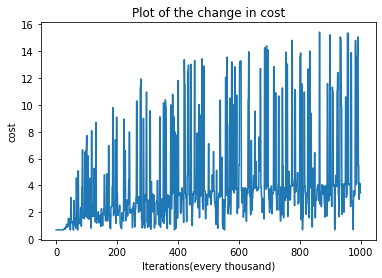

Computing the accuracy of the Shallow Neural Network on the following DataSet: Blobs300
Accuracy of the Training DataSet: 99.52380952380952 %
Accuracy of the Testing DataSet: 98.88888888888889 %


In [ ]:
#Testing on the blobs data set:
#I am saving the returned data in the variable, 'Parameters_Blobs_Test'

data_set = "Blobs300"
Parameters_Blobs_Test = NN_Model(data_set, X_train_flatten_blobs, Y_train_flatten_blobs, X_test_flatten_blobs, 
                                 Y_test_flatten_blobs, h = 50, epochs=500, learning_rate = 0.005)

## Test Results on the blobs300 dataset:

From the results above it is clear that the Neural Network is able to handle the blobs300 data with an accuracy of 99% on the Test data and with an accuracy of 100% on the training data. 

Cost after 0 epoch: 0.693070
Cost after 100 epoch: 0.700139
Cost after 200 epoch: 0.705299
Cost after 300 epoch: 0.703378
Cost after 400 epoch: 0.725833


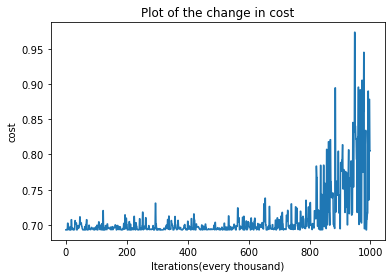

Computing the accuracy of the Shallow Neural Network on the following DataSet: Circles600
Accuracy of the Training DataSet: 79.52380952380952 %
Accuracy of the Testing DataSet: 77.77777777777777 %


In [ ]:
#Testing on the circles600 data set:
#I have stored the returned parameters on the Parameters_Circle_Test

data_set = "Circles600"
Parameters_Circle_Test = NN_Model(data_set, X_train_flatten_circles, Y_train_flatten_circles, X_test_flatten_circles, 
                                  Y_test_flatten_circles, h = 50, epochs=500, learning_rate = 0.005)

## Test results on the circles600 dataset:

From the results above we can observe that the Neural Network has been able to handle the circles data set, with a better accuracy. The Logistic Regression model was giving an accuracy score of 58%, whereas the Neural Network is giving an accuracy of 77 %. Neural Networks usually require a large amount of data to perform better. As this is quite a small data set a performance of 77% is quite decent. 

So the Neural Network is giving a better accuracy score while handling the circles data set compared to the Logistic Regression Algorithm. 

# Part IV:
## Challenging Task

In this task I have loaded the CIFAR10 data set using the code provided by Michael Madden. 

# Load and View CIFAR-10 Data

Michael Madden, Feb 2021.

This is sample code to load data from the CIFAR-10 dataset, and view some images.
The function unpickle() below is taken from the CIFAR website.

Note that the CIFAR-10 images as displayed are quite fuzzy looking, because they are low res (32x32).

Befor running this:
* Download the CIFAR-10 dataset from https://www.cs.toronto.edu/~kriz/cifar.html 
* Unzip and extract the tar file to get individual files called data_batch_1, etc.

In [ ]:
# This function taken from the CIFAR website

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Loaded in this way, each of the batch files contains a dictionary with the following elements:
#   data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. 
#           The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. 
#           The image is stored in row-major order, so that the first 32 entries of the array are the red channel values 
#           of the first row of the image.
#   labels -- a list of 10000 numbers in the range 0-9. 
#             The number at index i indicates the label of the ith image in the array data.


In [ ]:
def loadbatch(batchname):
    folder = 'cifar-10-batches-py'
    batch = unpickle(folder+"/"+batchname)
    return batch

In [ ]:
def loadlabelnames():
    folder = 'cifar-10-batches-py'
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']

In [ ]:
import matplotlib.pyplot as plt

def visualise(data, index):
    # MM Jan 2019: Given a CIFAR data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (32x32).

    picture = data[index]
    # Initially, the data is a 1D array of 3072 pixels; reshape it to a 3D array of 3x32x32 pixels
    # Note: after reshaping like this, you could select one colour channel or average them.
    picture.shape = (3,32,32) 
    
    # Plot.imshow requires the RGB to be the third dimension, not the first, so need to rearrange
    picture = picture.transpose([1, 2, 0])
    plt.imshow(picture)
    plt.show()

In [ ]:
batch1 = loadbatch('data_batch_1')
print("Number of items in the batch is", len(batch1))

# Display all keys, so we can see the ones we want
print('All keys in the batch:', batch1.keys())

Number of items in the batch is 4
All keys in the batch: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [ ]:
data = batch1[b'data']
labels = batch1[b'labels']
print ("size of data in this batch:", len(data), ", size of labels:", len(labels))
print (type(data))
print(data.shape)

names = loadlabelnames()

size of data in this batch: 10000 , size of labels: 10000
<class 'numpy.ndarray'>
(10000, 3072)


In [ ]:
# Display a few images from the batch
for i in range (100,120):
   visualise(data, i)
   print("Image", i,": Class is ", names[labels[i]], "class id=", labels[i])

In [ ]:
red_channel = data[:,:1024]
    
labels = np.array([labels])
labels = labels.T


data_set = np.append(red_channel,labels,axis=1)
automobile= data[data[:,-1] == 1]
ship = data[data[:,-1] == 8]
y = np.concatenate((automobile,ship),axis=0)

Y = y[:,[-1]]
Y[Y==8] = 0

X = np.delete(y,-1,1)

In [ ]:
#Splitting the CIFAR dataset and storing the train and test data 

X_train_cifar, X_test_cifar, Y_train_cifar, Y_test_cifar = train_test_split(X, Y, 
                                               test_size=0.3, random_state=17)


In [ ]:
#In the below step I am transposing the data to fit it into the input format:
X_train_cifar = np.transpose(X_train_cifar)
X_test_cifar = np.transpose(X_test_cifar)
Y_train_cifar = np.transpose(Y_train_cifar)
Y_test_cifar = np.transpose(Y_test_cifar)

#In the below code I am normalizing the input data by dividing it by 255
X_train_cifar = X_train_cifar/255
X_test_cifar = X_test_cifar/255

#I am printing the shape of the input data to understand if it could be fit into the model 
print(X_train_cifar.shape)
print(Y_train_cifar.shape)
print(X_test_cifar.shape)
print(Y_test_cifar.shape)

(3071, 37)
(1, 37)
(3071, 17)
(1, 17)


Cost after 0 epoch: 0.691916
Cost after 100 epoch: 0.692551
Cost after 200 epoch: 2.039445
Cost after 300 epoch: 0.704991
Cost after 400 epoch: 0.734724


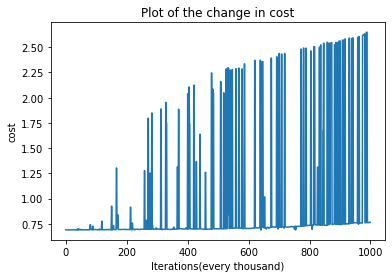

Computing the accuracy of the Shallow Neural Network on the following DataSet: CIFAR
Accuracy of the Training DataSet: 78.37837837837839 %
Accuracy of the Testing DataSet: 64.70588235294117 %


In [ ]:
#In the below lines of code, I am testing the CIFAR Data Set in the Neural Network
#I am storing the result set in the Parameters_CIFAR_Test and I am plotting the Change in Cost 

data_set = "CIFAR"
Parameters_CIFAR_Test = NN_Model(data_set, X_train_cifar, Y_train_cifar,X_test_cifar,
                          Y_test_cifar, h = 10, epochs=500, learning_rate = 0.005)

## Note on CIFAR Test Results

I am testing on the classes: ship and automobile. 

From the above results we can see that the Accuracy of the Neural Network on the Training DataSet is around 73%, which is pretty good, but the accuracy on the Testing DataSet is only around 64%. The accuracy on the test set is not good enough, this might imporve by implementing features like adding more hidden layers to the existing Neural Network. 

# Part V:
## Deep Learning Enhancements

In the below section I have tried to implement the Deep Learning Enhancements to the existing Neural Network that I have developed. 

In the below lines of code I have added the following enhaanncements:

1)Added an extra Hidden Layer to make the enhanced network as a deep network. 

2)Implemented the L2 Regularization to avoid overfitting of the data. The L2 regularization method introduces a penalty term on the cost function, depending on the model complexity. I have implemented it in the 'regularization_cost' function.

I have defined each of the fucntions seperately and have combined them in a cumulative function(Model) at the end. 

In [ ]:
#Function for Initialiing the parameters:
def NN2_parameter_initialization(layers):
  #Passing the list of layers to be used in the Neural Network.
    params = {}
    L = len(layers) 
    
    for i in range(L-1):
        # Update weight with weight Normalization
        params["W" + str(i+1)] = np.random.randn(layers[i+1], layers[i]) / np.sqrt(layers[i])
        params["b" + str(i+1)] = np.zeros((layers[i+1], 1));

    return params

In [ ]:
#Function to compute the Forward Propagation
#This function takes in the values of X, parameters
#The function returns the values of A1,A2,A3. 

def NN2_forward_propagation(X, params):

    #Isolating the parameters from the returned dictionary. 
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    W3 = params["W3"]
    b3 = params["b3"]

    #Layer: 1
    #Computing the z1 value for Layer 1:
    z1 = np.dot(W1, X) + b1
    #Computing the A1 value for Layer 1:
    A1 = sigmoid(z1)

    #Layer: 2
    #Computing the z2 value for Layer 2:
    z2 = np.dot(W2, A1) + b2
    #Computing the A2 value for Layer 2:
    A2 = sigmoid(z2)

    #Layer: 3
    #Computing the z3 value for Layer 3:
    z3 = np.dot(W3, A2) + b3
    #Computing the A3 value for Layer 3:
    A3 = sigmoid(z3)

    #Storing the required values in the variable, forward_prop
    forward_propagation = (W1, b1, A1 , W2, b2, A2 ,W3, b3, A3)

    #Returning the forward_prop to the calling function
    return forward_propagation

In [ ]:
#Function to compute the Regularization cost
#The function takes in the A3, Y, forward_prop and lambda. 
#This function will add the penalty term to the computed cost

def regularization_cost(A3, Y, forward_prop, lambd=0.1):
    
    
    #The shape of the Y, has been stored in the variable 'm'
    m = Y.shape[1]
    
    (W1, b1, A1 , W2, b2, A2 ,W3, b3, A3) = forward_prop
    
    #Calculating the cross-entropy
    cross_entropy_cost = get_cost(A3, Y) 
    
    #L2-component
    L2_regularization_cost =lambd * (np.sum(np.square(W1))
                                     + np.sum(np.square(W2)) 
                                     + np.sum(np.square(W3))) / (2 * m)
    
    #Post L2-regularisation cost
    #I am updating the cost at this step
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

In [ ]:
#Function to compute the backpropagation steps.
#The function will take in the data set, data returned by the forward propagation step and the lambda.
#The function will return the gradients. 

def NN2_back_propagation(X, Y, forward_prop,lambd = 0.1):

    (W1, b1, A1 , W2, b2, A2 ,W3, b3, A3) = forward_prop

    #Saving the shape of X in 'm'. 
    m = X.shape[1]

    #I am computing the backpropagation steps from the output to the input 
    
    #Layer: 3
    dZ3 = (A3 - Y) 
    dW3 = 1./m * np.dot(dZ3, A2.T) + (lambd * W3) / m
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)

    #Layer: 2
    #Computing the gradients of Layer 2
    dA2 = np.dot(W3.T, dZ3)

    dZ2 =  np.multiply(np.dot(np.transpose(W3), dZ3), 1 - np.power(A2, 2))                   
    dW2 = 1./m * np.dot(dZ2, A1.T) + (lambd * W2) / m
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)

    #Layer: 1
    #Computing the gradients of Layer 1
    dA1 = np.dot(W2.T, dZ2)

    dZ1 =  np.multiply(np.dot(np.transpose(W2), dZ2), 1 - np.power(A1, 2))                  
    dW1 = 1./m * np.dot(dZ1, X.T) + (lambd * W1) / m
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
        

    gradients = {"dW3": dW3, "db3": db3, "dW2": dW2, "db2": db2, "dW1": dW1, "db1": db1}
                 
    return gradients

In [ ]:
#Function to update parameters.
#The function will take in the parameters, gradients and learning rate.
#The function will return the updated parameters. 
#This function executes the following formula: 
#w = w - (learning rate)*dw
#b = b - (learning rate)*db

def NN2_update(params, gradients, learning_rate):

    #Storing the number of Layers
    L = len(params) // 2 

    #Updating the parameters
    for i in range(L):
        params["W" + str(i+1)] = params["W" + str(i+1)] - learning_rate * gradients["dW" + str(i+1)]
        params["b" + str(i+1)] = params["b" + str(i+1)] - learning_rate * gradients["db" + str(i+1)]

    #Returning the updated parameters
    return params

In [ ]:
#Function to predict the output.
#The function will take in the X values, parameters.
#The function will return the Y_pred values. 

def NN2_prediction(parameters, X):

    m = X.shape[1]
    Y_pred = np.zeros((1,m))

    forward_prop = NN2_forward_propagation(X, parameters)
    (W1, b1, A1 , W2, b2, A2 ,W3, b3, A3) = forward_prop
    
    for i in range(A3.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        Y_pred[0, i] = 1 if A3[0, i] > 0.5 else 0
      
    return Y_pred

In [ ]:
#Function to combine the functions into the final model 

def NN2_model(data_set, X_train, Y_train, X_test, Y_test, 
              learning_rate = 0.01,epochs = 20000, h1=10, h2=5,lambd = 0.1):
    
                    
    #Initialized the gradients and cost_list
    gradients = {}
    cost_list = [] # to keep track of the loss

    layers = [X_train.shape[0], h1, h2, 1]

    #Initialize parameters dictionary.
    parameters = NN2_parameter_initialization(layers)

    #Running the loop over the epochs 

    for i in range(epochs):

        #Calling the Forward propagation function,  
        #storing the result in forward_prop
        forward_prop = NN2_forward_propagation(X_train, parameters)
        
        (W1, b1, A1 , W2, b2, A2 ,W3, b3, A3) = forward_prop
        
        #Computing the regularization cost
        cost = regularization_cost(A3, Y_train, forward_prop, lambd)

        #Calling the Backpropagation fucntion
        gradients = NN2_back_propagation(X_train, Y_train, forward_prop, lambd)

        #Calling the function to Update parameters
        parameters = NN2_update(parameters, gradients, learning_rate)

        #I am prinitng the cost after each epoch. 
        if i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            cost_list.append(cost)
            
    #Calling the prediction fucntion to predict values

    Y_pred_train = NN2_prediction(parameters,X_train)
    Y_pred_test = NN2_prediction(parameters,X_test)
    

    #Printing the accuracy on the dataset
    print("Printing the Accuracy of the Enhanced Neural Network on the following DataSet:",data_set)
    print("Accuracy on the Training DataSet: {} %"
          .format(100 - np.mean(np.abs(Y_pred_train - Y_train)) * 100))
    print("Accuracy on the Testing DataSet: {} %"
          .format(100 - np.mean(np.abs(Y_pred_test - Y_test)) * 100))

    #I am plotting the cost below
    plt.plot(cost_list)
    plt.ylabel('cost')
    plt.xlabel('Iterations')
    plt.title("Plotting the change in cost at the Learning rate =" + str(learning_rate))
    plt.show()

    #I am returning the parameters to the calling function
    return parameters

Cost after iteration 0: 0.85258480956798
Cost after iteration 100: 0.6731027934372922
Cost after iteration 200: 0.5938581706497067
Cost after iteration 300: 0.501578041295472
Cost after iteration 400: 0.41077891662045823
Cost after iteration 500: 0.34002216769233046
Cost after iteration 600: 0.2932458413791734
Cost after iteration 700: 0.264155104565237
Cost after iteration 800: 0.24609278427714643
Cost after iteration 900: 0.23467239133298848
Cost after iteration 1000: 0.2273202119863179
Cost after iteration 1100: 0.22255888312071467
Cost after iteration 1200: 0.2195448943873175
Cost after iteration 1300: 0.21781797964213812
Cost after iteration 1400: 0.2171606308850182
Cost after iteration 1500: 0.2174905048188319
Cost after iteration 1600: 0.21875870066999667
Cost after iteration 1700: 0.22088206355778767
Cost after iteration 1800: 0.22373426271824834
Cost after iteration 1900: 0.22717236617436962
Printing the Accuracy of the Enhanced Neural Network on the following DataSet: Blobs30

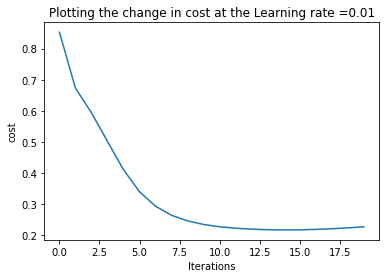

In [ ]:
#Testing on the Blobs dataset:
data_set = "Blobs300"

Blobs_Test_Parameter = NN2_model(data_set, X_train_flatten_blobs, Y_train_flatten_blobs,X_test_flatten_blobs,Y_test_flatten_blobs, 
learning_rate = 0.01, epochs = 2000, h1=124,h2=64, lambd=0.1)

Cost after iteration 0: 0.732427806793821
Cost after iteration 100: 0.7159491528017818
Cost after iteration 200: 0.7157135983690127
Cost after iteration 300: 0.7154924917969171
Cost after iteration 400: 0.7152845178246765
Cost after iteration 500: 0.7150887760239233
Cost after iteration 600: 0.7149044539029542
Cost after iteration 700: 0.7147308114103524
Cost after iteration 800: 0.7145671680709753
Cost after iteration 900: 0.7144128919080543
Cost after iteration 1000: 0.7142673898766579
Cost after iteration 1100: 0.7141300995794293
Cost after iteration 1200: 0.7140004820678152
Cost after iteration 1300: 0.7138780155563768
Cost after iteration 1400: 0.7137621898973344
Cost after iteration 1500: 0.7136525016796214
Cost after iteration 1600: 0.7135484498330624
Cost after iteration 1700: 0.7134495316351501
Cost after iteration 1800: 0.7133552390360568
Cost after iteration 1900: 0.713265055237597
Printing the Accuracy of the Enhanced Neural Network on the following DataSet: Circles600
Accu

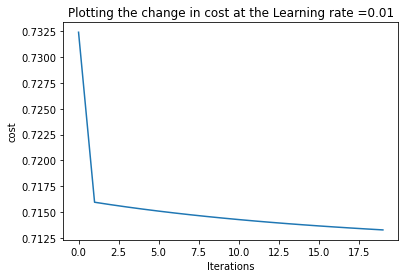

In [ ]:
#Testing on the circles dataset
data_set = "Circles600"

Circle_Test_Parameter = NN2_model(data_set, X_train_flatten_circles, 
 Y_train_flatten_circles, X_test_flatten_circles,Y_test_flatten_circles, 
 learning_rate = 0.01, epochs = 2000, h1=124,h2=64, lambd=0.1)

Cost after iteration 0: 0.947961728909218
Cost after iteration 100: 0.8895062944458361
Cost after iteration 200: 0.8467048007031832
Cost after iteration 300: 0.8111405042673483
Cost after iteration 400: 0.7839992802526107
Cost after iteration 500: 0.7694563220130941
Cost after iteration 600: 0.7717123404907491
Cost after iteration 700: 0.7916172838083926
Cost after iteration 800: 0.8291600713584841
Cost after iteration 900: 0.8836626931771057
Cost after iteration 1000: 0.9528608824356082
Cost after iteration 1100: 1.0319987702364606
Cost after iteration 1200: 1.120308804742295
Cost after iteration 1300: 1.2137291000255899
Cost after iteration 1400: 1.3086815972686932
Cost after iteration 1500: 1.4029121006767293
Cost after iteration 1600: 1.4944550504666734
Cost after iteration 1700: 1.5825134702121664
Cost after iteration 1800: 1.6670233861594308
Cost after iteration 1900: 1.7476735405484127
Printing the Accuracy of the Enhanced Neural Network on the following DataSet: CIFAR
Accuracy 

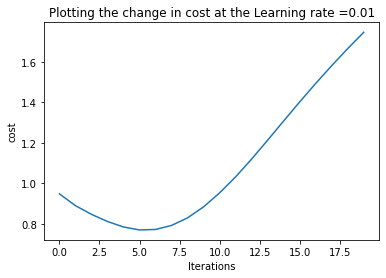

In [ ]:
#Testing on the CIFAR Dataset:
data_set = "CIFAR"

CIFAR_Test_Parameter = NN2_model(data_set, X_train_cifar, Y_train_cifar, 
X_test_cifar, Y_test_cifar, 
 learning_rate = 0.01, epochs = 2000, h1=124,h2=64, lambd=0.1)

# Testing of the enhanced Neural Network

## Testing on CIFAR Data Set:

From the testing results above it is clear that the accuracy of the Network has increased significantly on the CIFAR data set. The accuracy on the test set using the enhanced Neural Network is around 76%. This is an improvement when compared to the 64% accuracy as obtained on the Shallow Neural Network. 

The accuracy of the blobs300 is 100% on the testing set on both the Shallow Neural Network as well as the Enhanced Neural Network. The accuracy of the circles600 dataset has reduced in this case, whereas it is around 77% on the Shallow Neural Network. Thus the performance of the enhanced Neural Netwok has improved significantly on the CIFAR-10 data set whereas the performance has reduced for the Circles600 dataset. This can be because of the enhancements are expected to work better in cases involving large data sets, rather than smaller ones. 

I had experimented with quite a few settings of the learning rate and epochs. I found the setting of learning rate of 0.01 and epochs of 2000 to be the best fit for the given datasets. 

# References:

1) Deep Learning Lectures, by Michael Madden (CT5133), National University of Ireland, Galway. 

2)Neural Networks and Deep Learning, lectures by Andrew NG on Coursera

3)Simon Haykin, Neural Networks and Learning Machines, 3rd Edition, Chapter 4: Multilayer Perceptrons

4)Simon Haykin, Neural Networks and Learning Machines, 3rd Edition, Chapter 7: Regularization Theory

5)Deep Learning Book by Goodfellow, Bengio & Courville

6)Joel Grus, Data Science from Scratch, Chapter 18: Neural Networks

7)Joel Grus, Data Science from Scratch, Chapter 19: Deep Learning

8)Joel Grus, Data Science from Scratch, Chapter 8: Gradient Descent

9)[How to Configure the Number of Layers and Nodes in a Neural Network: Machine Learning Mastery](https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/)

10)[Use Weight Regularization to Reduce Overfitting of Deep Learning Models: Machine Learning Mastery](https://machinelearningmastery.com/weight-regularization-to-reduce-overfitting-of-deep-learning-models/)